In [1]:
f = open("predictions_salman_clean.csv", "r")

class_ids = {}
for i in range(1000):
    class_ids[str(i)] = 0

for row in f:
    entry = row.split(";")
    if entry[1] == entry[3]:
        class_ids[entry[1]] += 1

In [2]:
sorted_class_ids = dict(sorted(class_ids.items(), key=lambda x: x[1]))
sorted_class_ids

{'836': 0,
 '638': 1,
 '837': 1,
 '848': 1,
 '876': 1,
 '620': 2,
 '681': 2,
 '744': 2,
 '885': 2,
 '664': 3,
 '782': 3,
 '899': 3,
 '68': 4,
 '266': 4,
 '282': 4,
 '618': 4,
 '60': 5,
 '600': 5,
 '689': 5,
 '810': 5,
 '907': 5,
 '516': 6,
 '527': 6,
 '633': 6,
 '657': 6,
 '663': 6,
 '978': 6,
 '240': 7,
 '813': 7,
 '928': 7,
 '46': 8,
 '167': 8,
 '415': 8,
 '454': 8,
 '461': 8,
 '499': 8,
 '501': 8,
 '585': 8,
 '623': 8,
 '700': 8,
 '728': 8,
 '961': 8,
 '124': 9,
 '488': 9,
 '838': 9,
 '923': 9,
 '998': 9,
 '381': 10,
 '485': 10,
 '493': 10,
 '526': 10,
 '541': 10,
 '673': 10,
 '748': 10,
 '818': 10,
 '824': 10,
 '969': 10,
 '202': 11,
 '434': 11,
 '482': 11,
 '542': 11,
 '706': 11,
 '733': 11,
 '817': 11,
 '960': 11,
 '975': 11,
 '999': 11,
 '163': 12,
 '265': 12,
 '285': 12,
 '312': 12,
 '414': 12,
 '445': 12,
 '469': 12,
 '478': 12,
 '504': 12,
 '587': 12,
 '596': 12,
 '718': 12,
 '731': 12,
 '740': 12,
 '764': 12,
 '909': 12,
 '987': 12,
 '36': 13,
 '58': 13,
 '62': 13,
 '400': 1

In [3]:
import json
with open("safebets.json") as f:
    safebets = json.load(f)

In [4]:
max = 0
count = 0
total = 0
for i in range(1000):
    if str(i) not in safebets['salman']:
        print("Class", i, "not in safebets due to having less than 5 legitimate images")

    else:
        if len(safebets['salman'][str(i)]) > max:
            max = len(safebets['salman'][str(i)])
        if len(safebets['salman'][str(i)]) < 5:
            print(i, len(safebets['salman'][str(i)]))
            count += 1
        total += len(safebets['salman'][str(i)])

print("Max", max)
print("Count", count)
print("Total", total)

68 4
266 4
282 4
618 4
620 2
638 1
664 3
Class 681 not in safebets due to having less than 5 legitimate images
744 2
Class 782 not in safebets due to having less than 5 legitimate images
Class 836 not in safebets due to having less than 5 legitimate images
Class 837 not in safebets due to having less than 5 legitimate images
848 1
876 1
885 2
899 3
Max 5
Count 12
Total 4951


In [5]:
with open("notes.txt", "r") as file:
    content = file.read()

In [6]:
# Count number of "double new lines" ("\n\n") in the file
modified_classes = content.count("\n\n")
clean_classes = 1000 - modified_classes

In [7]:
modified_classes

553

In [8]:
clean_classes

447

In [9]:
# Get all lines that start with the string "X-Tra" and append every following line until an empty line is found
xtra_lines = []
xtra_counter = 0
for line in content.split("\n"):
    if line.startswith("X-Tra"):
        xtra_counter += 1
        xtra_lines.append(line)
        next_line = content.split("\n")[content.split("\n").index(line) + 1]
        while next_line != "":
            xtra_lines.append(next_line)
            next_line = content.split("\n")[content.split("\n").index(next_line) + 1]


In [10]:
# Count number of "JPEG" in the xtra lines
# I.e., total number of images outside of the top-5 which were added to the dataset
jpeg_count = sum([line.count("JPEG") for line in xtra_lines])

In [11]:
jpeg_count

109

In [12]:
# Count number of "ILSVRC2012_" in the xtra lines
# I.e., total number of images outside of the top-5 which were added to the dataset
ilsvrc_count = sum([line.count("ILSVRC2012_") for line in xtra_lines])

In [13]:
ilsvrc_count

109

In [14]:
# Get new array without lines from the xtra_lines array
without_xtra = [line for line in content.split("\n") if line not in xtra_lines]

In [15]:
without_xtra[0:5]

['# List of images that needed to be edited',
 'class 5: ILSVRC2012_val_00008640 and ILSVRC2012_val_00027633 needed to be cropped',
 'due to frame surrounding the image.',
 '',
 'class 12: ILSVRC2012_val_00031171 and ILSVRC2012_val_00001336 need to be cropped']

In [16]:
content_lines = content.split("\n")

In [17]:
# Create a string for each class, containing all the lines that belong to that class
classes_desc = []
index = -1
for line in content_lines[1:]:
    if line.startswith("class"):
        index += 1
        classes_desc.append(line)
    elif line.strip():
        classes_desc[index] += " " + line


In [18]:
classes_desc[0:2]

['class 5: ILSVRC2012_val_00008640 and ILSVRC2012_val_00027633 needed to be cropped due to frame surrounding the image.',
 'class 12: ILSVRC2012_val_00031171 and ILSVRC2012_val_00001336 need to be cropped due to smaller watermarks. ILSVRC2012_val_00048437 removed due to visible noise within image.']

In [19]:
# Return a list of indices of the classes that do not contain the string "remove(d)" in their description
# and contain the string "--" in their description as these descriptions either contain general information
# or further information about classes where images were already removed
classes_to_keep = [index for index, desc in enumerate(classes_desc) if "remove" not in desc.lower() and "--" not in desc.lower()]

In [20]:
# Get the number of classes that will be kept
# These are the classes that were able to keep their original top-3 by cropping some of them
print(len(classes_to_keep))

for index in classes_to_keep:
    print(classes_desc[index])

21
class 5: ILSVRC2012_val_00008640 and ILSVRC2012_val_00027633 needed to be cropped due to frame surrounding the image.
class 29: ILSVRC2012_val_00003860 and ILSVRC2012_val_00022113 need to be cropped due to watermark
class 31: ILSVRC2012_val_00003846 needs to be cropped due to outer frame.
class 81: ILSVRC2012_val_00001596.JPEG needs to be cropped due to watermark.
class 101: ILSVRC2012_val_00031269.JPEG needed to be cropped.
class 143: ILSVRC2012_val_00031760.JPEG and ILSVRC2012_val_00049227.JPEG needed to be cropped watermarks.
class 244: ILSVRC2012_val_00039115.JPEG and ILSVRC2012_val_00006957.JPEG
class 270: ILSVRC2012_val_00035908.JPEG and ILSVRC2012_val_00042098.JPEG due to watermarks.
class 287: ILSVRC2012_val_00013798.JPEG needed to be cropped.
class 301: ILSVRC2012_val_00005343.JPEG needed to be cropped.
class 561: ILSVRC2012_val_00018938.JPEG required cropping.
class 581: ILSVRC2012_val_00036409.JPEG required cropping.
class 584: ILSVRC2012_val_00043418.JPEG due to watermar

### Classes with removed top-3 images

All classes not in the classes_to_keep list were images that required the removal of images


In [21]:
# Get the classes that contain the string "X-Tra" in their description
# These are the classes that have been modified by adding more images
classes_with_xtra = [index for index, desc in enumerate(classes_desc) if "X-Tra" in desc]

In [22]:
# Get the number of classes that required additional images
print(len(classes_with_xtra))

59


In [23]:
for index in classes_with_xtra:
    print(classes_desc[index])

class 47: ACTION REQUIRED -- ONE MORE IMAGE NEEDED ILSVRC2012_val_00025511, ILSVRC2012_val_00048675, and ILSVRC2012_val_00003560 contain watermark in center of image. X-Tra: ILSVRC2012_val_00034600.JPEG -- all images ranked higher either are part of the initial top 5, contain watermarks or visible noise.
class 169: ACTION REQUIRED: one additional image required ILSVRC2012_val_00040908.JPEG, ILSVRC2012_val_00040878.JPEG and  ILSVRC2012_val_00006495.JPEG removed due to apparent modifications. X-Tra: ILSVRC2012_val_00004261.JPEG -- all images ranked higher either are part of the initial top 5 or contain apparent modification.
class 194: ACTION REQUIRED: really not sure about this one... ILSVRC2012_val_00015182.JPEG and ILSVRC2012_val_00000725.JPEG removed due to apparent modification. ILSVRC2012_val_00036443.JPEG  needed to be cropped. X-Tra: ILSVRC2012_val_00035844.JPEG -- all higher ranked images were already part of the initial top 5.
class 195: ACTION REQUIRED: new images needed! ILSV

In [24]:
# Get class numbers from classes_top5_subs descriptions
# E.g., class 56: ILSVRC2012_val_00015762 removed due to apparent modification. ILSVRC2012_val_00005676 needed to be cropped due to frame/border.
# Should return 56

class_numbers_with_xtra = [int(desc.split(":")[0].split(" ")[1]) for index, desc in enumerate(classes_desc) if index in classes_with_xtra]


In [25]:
class_numbers_with_xtra

[47,
 169,
 194,
 195,
 212,
 241,
 271,
 272,
 277,
 292,
 296,
 362,
 366,
 398,
 427,
 430,
 432,
 459,
 463,
 464,
 472,
 473,
 482,
 491,
 503,
 530,
 543,
 545,
 546,
 548,
 550,
 590,
 604,
 606,
 611,
 639,
 666,
 680,
 683,
 713,
 715,
 735,
 765,
 771,
 778,
 782,
 783,
 790,
 805,
 818,
 840,
 881,
 897,
 902,
 903,
 935,
 956,
 957,
 971]

In [26]:
# For each sentence in a class description containing the keyword "X-Tra",
# filter out sentences that do not contain the string "removed"

classes_with_xtra_desc = [desc for index, desc in enumerate(classes_desc) if index in classes_with_xtra]

classes_with_xtra_desc_filtered = []
for desc in classes_with_xtra_desc:
    sentences = desc.split(". ")
    filtered = [sentence for sentence in sentences if "removed" in sentence]
    classes_with_xtra_desc_filtered.append(filtered)

# For each classes_with_xtra_desc_filtered entry, count the number of times the string "ILSVRC2012_val" appears across all sentences
ilsvrc_count_with_xtra = [sum([sentence.count("ILSVRC2012_val") for sentence in desc]) for desc in classes_with_xtra_desc_filtered]

# Get the total number of images that were removed from X-Tra classes
sum(ilsvrc_count_with_xtra)

85

In [27]:
# Get the classes that contain the string "FINAL REMARK" in their description
# These are the classes that have been modified by adding more images
# BUT did not have enough images to get three valid images
classes_with_remark = [index for index, desc in enumerate(classes_desc) if "FINAL REMARK" in desc]

In [28]:
print(len(classes_with_remark))

18


In [29]:
for index in classes_with_remark:
    print(classes_desc[index])

class 472: FINAL REMARK -- only two valid images exist!  all five images removed due to watermark. X-Tra: ILSVRC2012_val_00033316.JPEG, ILSVRC2012_val_00043133.JPEG -- all other images contained the very same watermark!
class 482: FINAL REMARK -- only two valid images exist! Apart from ILSVRC2012_val_00023625.JPEG, all images were removed due to their small size. X-Tra: ILSVRC2012_val_00012468.JPEG -- every other images was either too small, contained visible modifications, or watermarks.
class 501: FINAL REMARK -- Only two valid images exist. ILSVRC2012_val_00040125.JPEG and ILSVRC2012_val_00038702.JPEG removed due to apparent modifications. ILSVRC2012_val_00042333.JPEG required cropping.
class 550: FINAL REMARK -- only two valid images exist all five images were either too small or displayed artificial backgrounds. X-Tra: ILSVRC2012_val_00009613.JPEG and ILSVRC2012_val_00017876.JPEG -- all other images were either too small or contained an artificial background.
class 618: FINAL REMA

In [30]:
# Get the classes that are neither in the classes_to_keep nor in the classes_with_xtra list nor in classes_with_remark
# These are the classes that have been modified by substituting top-3 images with top-5 images
classes_top5_subs = [index for index, desc in enumerate(classes_desc) if index not in classes_to_keep and index not in classes_with_xtra and index not in classes_with_remark]

In [31]:
len(classes_top5_subs)

459

In [32]:
# Get indices of classes that are in classes_with_remark but not in classes_with_xtra

classes_with_remark_not_xtra = [index for index in classes_with_remark if index not in classes_with_xtra]

In [33]:
# Together with the X-tra classes, these classes make up all classes
# which required new images based on the Salman predictions
# To figure out the total number of initially removed images, we also
# have to get the number of ILRVC2012 images that were removed from these 14 classes

class_numbers_with_remark_not_xtra = [int(desc.split(":")[0].split(" ")[1]) for index, desc in enumerate(classes_desc) if index in classes_with_remark_not_xtra]

# For each sentence in a class description containing "FINAL REMARK"
# but not containing "X-Tra", filter out sentences 
# that contain the string "removed"

classes_with_remark_not_xtra_desc = [desc for index, desc in enumerate(classes_desc) if index in class_numbers_with_remark_not_xtra]

classes_with_remark_not_xtra_desc_filtered = []
for desc in classes_with_remark_not_xtra_desc:
    sentences = desc.split(". ")
    filtered = [sentence for sentence in sentences if "removed" in sentence]
    classes_with_remark_not_xtra_desc_filtered.append(filtered)

# For each classes_with_remark_not_xtra_desc entry, count the number of times the string "ILSVRC2012_val" appears across all sentences
ilsvrc_count_with_remark_not_xtra = [sum([sentence.count("ILSVRC2012_val") for sentence in desc]) for desc in classes_with_remark_not_xtra_desc_filtered]

# Get the total number of images that were removed from X-Tra classes
sum(ilsvrc_count_with_remark_not_xtra)

1

In total, we had to remove **86** images within these 73 classes

In [34]:
len(class_numbers_with_remark_not_xtra)

14

In [35]:
len(classes_with_xtra)

59

In [36]:
for index in classes_with_xtra:
    print(classes_desc[index])

class 47: ACTION REQUIRED -- ONE MORE IMAGE NEEDED ILSVRC2012_val_00025511, ILSVRC2012_val_00048675, and ILSVRC2012_val_00003560 contain watermark in center of image. X-Tra: ILSVRC2012_val_00034600.JPEG -- all images ranked higher either are part of the initial top 5, contain watermarks or visible noise.
class 169: ACTION REQUIRED: one additional image required ILSVRC2012_val_00040908.JPEG, ILSVRC2012_val_00040878.JPEG and  ILSVRC2012_val_00006495.JPEG removed due to apparent modifications. X-Tra: ILSVRC2012_val_00004261.JPEG -- all images ranked higher either are part of the initial top 5 or contain apparent modification.
class 194: ACTION REQUIRED: really not sure about this one... ILSVRC2012_val_00015182.JPEG and ILSVRC2012_val_00000725.JPEG removed due to apparent modification. ILSVRC2012_val_00036443.JPEG  needed to be cropped. X-Tra: ILSVRC2012_val_00035844.JPEG -- all higher ranked images were already part of the initial top 5.
class 195: ACTION REQUIRED: new images needed! ILSV

In [37]:
for index in classes_with_remark_not_xtra:
    if index not in classes_with_remark:
        print(classes_desc[index])

#### Top-5 Substitution Insights

In [38]:
# Get class numbers from classes_top5_subs descriptions
# E.g., class 56: ILSVRC2012_val_00015762 removed due to apparent modification. ILSVRC2012_val_00005676 needed to be cropped due to frame/border.
# Should return 56

class_numbers = [int(desc.split(":")[0].split(" ")[1]) for index, desc in enumerate(classes_desc) if index in classes_top5_subs]


In [39]:
len(class_numbers)

459

In [40]:
# For each sentence in a class description, filter out sentences that do not contain the string "removed"

classes_top5_subs_desc = [desc for index, desc in enumerate(classes_desc) if index in classes_top5_subs]

classes_top5_subs_desc_filtered = []
for desc in classes_top5_subs_desc:
    sentences = desc.split(". ")
    filtered = [sentence for sentence in sentences if "removed" in sentence]
    classes_top5_subs_desc_filtered.append(filtered)

In [41]:
# For each classes_top5_subs_desc_filtered entry, count the number of times the string "ILSVRC2012_val" appears across all sentences
ilsvrc_count = [sum([sentence.count("ILSVRC2012_val") for sentence in desc]) for desc in classes_top5_subs_desc_filtered]

In [42]:
# This is the total number of images that were removed from the original top-3
sum(ilsvrc_count)

626

In [43]:
# Show all ilsvrc_count entries > 2
for x in ilsvrc_count:
    if x > 2:
        print(x)

In [44]:
# Get the classes from classes_top5_subs that contain the string "crop" in their description
# These are classes that include cropped top-5 images in their new top-3
classes_top5_subs_crop = [index for index in classes_top5_subs if "crop" in classes_desc[index].lower()]

In [45]:
len(classes_top5_subs_crop)

57

In [46]:
for index in classes_top5_subs_crop:
    print(classes_desc[index])

class 12: ILSVRC2012_val_00031171 and ILSVRC2012_val_00001336 need to be cropped due to smaller watermarks. ILSVRC2012_val_00048437 removed due to visible noise within image.
class 56: ILSVRC2012_val_00015762 removed due to apparent modification. ILSVRC2012_val_00005676 needed to be cropped due to frame/border.
class 63: ILSVRC2012_val_00014457 and ILSVRC2012_val_00027824 removed due to watermark. ILSVRC2012_val_00020161 and ILSVRC2012_val_00014181 require cropping.
class 88: ILSVRC2012_val_00013768.JPEG removed due to watermark. ILSVRC2012_val_00009146.JPEG needed to be cropped due to border.
class 92: ILSVRC2012_val_00001678.JPEG removed as it is a collage of images. ILSVRC2012_val_00011237.JPEG needed to cropped due to watermark.
class 95: ILSVRC2012_val_00039281.JPEG removed due to poor position of watermark. Remaining 3 images need to be cropped due to watermark.
class 107: ILSVRC2012_val_00035964.JPEG removed due to noise. ILSVRC2012_val_00009993.JPEG needed to be cropped due to 

In [47]:
class_numbers[:5]

[12, 13, 14, 16, 17]

In [48]:
# Create enum for synonyms of keywords
from enum import Enum
class Synonyms(Enum):
    WATERMARK = ["watermark", "copyright"]
    FRAMES = ["frame", "border"]
    MODIFICATIONS = ["apparent modification"]
    ARTIFICIAL_BACKGROUND = ["artificial background", "inconsistent background"]
    LOW_QUALITY = ["low quality", "poor quality", "low resolution", "blurry", "pixelated", "poor resolution"]
    GREYSCALE = ["grayscale", "greyscale", "black and white", "monochrome"]
    COLLAGE = ["collage"]
    DRAWING = ["drawing", "painting"]
    NOISE = ["noise"]
    SMALL_SIZE = ["small size", "small resolution", "small image"]
    VIRTUAL = ["virtual rendition", "virtual object"]

In [49]:
# Get the classes from classes_top5_subs that contain the string "watermark" in their description

classes_top5_subs_watermark = [index for index in classes_top5_subs if any(synonym in classes_desc[index].lower() for synonym in Synonyms.WATERMARK.value)]

In [50]:
len(classes_top5_subs_watermark)

203

In [51]:
# For each class in class_

In [52]:
# Create dictionary with class numbers from class_numbers as keys and empty values
class_dict = {class_numbers[index]: [] for index in range(len(class_numbers))}

In [53]:
class_dict

{12: [],
 13: [],
 14: [],
 16: [],
 17: [],
 18: [],
 19: [],
 22: [],
 26: [],
 30: [],
 34: [],
 38: [],
 40: [],
 42: [],
 43: [],
 48: [],
 53: [],
 56: [],
 57: [],
 58: [],
 59: [],
 60: [],
 62: [],
 63: [],
 66: [],
 67: [],
 68: [],
 71: [],
 73: [],
 75: [],
 76: [],
 77: [],
 78: [],
 82: [],
 83: [],
 84: [],
 86: [],
 88: [],
 89: [],
 90: [],
 92: [],
 93: [],
 94: [],
 95: [],
 97: [],
 98: [],
 99: [],
 103: [],
 107: [],
 111: [],
 113: [],
 120: [],
 121: [],
 122: [],
 126: [],
 129: [],
 130: [],
 132: [],
 133: [],
 135: [],
 136: [],
 139: [],
 142: [],
 144: [],
 145: [],
 147: [],
 151: [],
 152: [],
 157: [],
 158: [],
 159: [],
 160: [],
 161: [],
 162: [],
 163: [],
 166: [],
 167: [],
 172: [],
 175: [],
 177: [],
 181: [],
 182: [],
 183: [],
 184: [],
 186: [],
 188: [],
 190: [],
 191: [],
 198: [],
 199: [],
 200: [],
 201: [],
 202: [],
 205: [],
 206: [],
 207: [],
 210: [],
 211: [],
 214: [],
 216: [],
 220: [],
 222: [],
 224: [],
 226: [],
 227: [

In [54]:
# Get class descriptions based on classes_top5_subs
class_desc_top5_subs = [classes_desc[index] for index in classes_top5_subs]

In [55]:
class_desc_top5_subs[1]

'class 13: ILSVRC2012_val_00013504 removed due to visible noise. '

In [56]:
# For each class in class_dict add the synonyms of the keywords found in the class description
# Iterate in numerical order to keep the class numbers in order
for class_index in range(len(class_numbers)):
    for synonym in Synonyms:
        if any(synonym in class_desc_top5_subs[class_index].lower() for synonym in synonym.value):
            class_dict[class_numbers[class_index]].append(synonym.name)

In [57]:
class_dict

{12: ['WATERMARK', 'NOISE'],
 13: ['NOISE'],
 14: ['MODIFICATIONS', 'NOISE'],
 16: ['WATERMARK', 'MODIFICATIONS'],
 17: ['WATERMARK', 'MODIFICATIONS'],
 18: ['DRAWING'],
 19: ['WATERMARK'],
 22: ['WATERMARK', 'FRAMES'],
 26: ['WATERMARK'],
 30: ['WATERMARK', 'MODIFICATIONS'],
 34: ['WATERMARK'],
 38: ['WATERMARK'],
 40: ['WATERMARK'],
 42: ['WATERMARK'],
 43: ['MODIFICATIONS'],
 48: ['FRAMES'],
 53: ['MODIFICATIONS'],
 56: ['FRAMES', 'MODIFICATIONS'],
 57: ['WATERMARK'],
 58: ['MODIFICATIONS'],
 59: ['WATERMARK'],
 60: ['WATERMARK'],
 62: ['FRAMES'],
 63: ['WATERMARK'],
 66: ['WATERMARK'],
 67: ['WATERMARK'],
 68: ['WATERMARK'],
 71: ['WATERMARK'],
 73: ['WATERMARK'],
 75: ['MODIFICATIONS'],
 76: ['MODIFICATIONS'],
 77: ['WATERMARK'],
 78: ['LOW_QUALITY'],
 82: ['WATERMARK'],
 83: ['WATERMARK'],
 84: ['MODIFICATIONS'],
 86: ['WATERMARK'],
 88: ['WATERMARK', 'FRAMES'],
 89: ['WATERMARK'],
 90: ['WATERMARK', 'FRAMES'],
 92: ['WATERMARK', 'COLLAGE'],
 93: ['WATERMARK'],
 94: ['WATERMARK']

In [58]:
# Count the occurences of each keyword in the class descriptions

# Create dictionary with keywords as keys and empty values
keyword_dict = {synonym.name: 0 for synonym in Synonyms}

for class_index in range(len(class_numbers)):
    for synonym in Synonyms:
        if any(synonym in class_desc_top5_subs[class_index].lower() for synonym in synonym.value):
            keyword_dict[synonym.name] += 1

In [59]:
keyword_dict

{'WATERMARK': 203,
 'FRAMES': 49,
 'MODIFICATIONS': 125,
 'ARTIFICIAL_BACKGROUND': 11,
 'LOW_QUALITY': 10,
 'GREYSCALE': 35,
 'COLLAGE': 17,
 'DRAWING': 3,
 'NOISE': 60,
 'SMALL_SIZE': 19,
 'VIRTUAL': 2}

In [60]:
# Get all class_dict keys with an empty array as value
# These are the classes that do not contain any of the keywords
classes_without_keywords = [class_number for class_number, keywords in class_dict.items() if not keywords]

In [61]:
len(classes_without_keywords)

4

In [62]:
classes_without_keywords

[787, 831, 849, 917]

In [63]:
keyword_dict["OTHER"] = len(classes_without_keywords)

In [64]:
# Create a new dictionary with updated keys
updated_keyword_dict = {}
for key, value in keyword_dict.items():
    if key == "ARTIFICIAL_BACKGROUND":
        new_key = "Artificial\nBackground"
    else:
        new_key = key.replace("_", " ").title()
    updated_keyword_dict[new_key] = value

# Update the original keyword_dict with the new keys
keyword_dict = updated_keyword_dict
keyword_dict

{'Watermark': 203,
 'Frames': 49,
 'Modifications': 125,
 'Artificial\nBackground': 11,
 'Low Quality': 10,
 'Greyscale': 35,
 'Collage': 17,
 'Drawing': 3,
 'Noise': 60,
 'Small Size': 19,
 'Virtual': 2,
 'Other': 4}

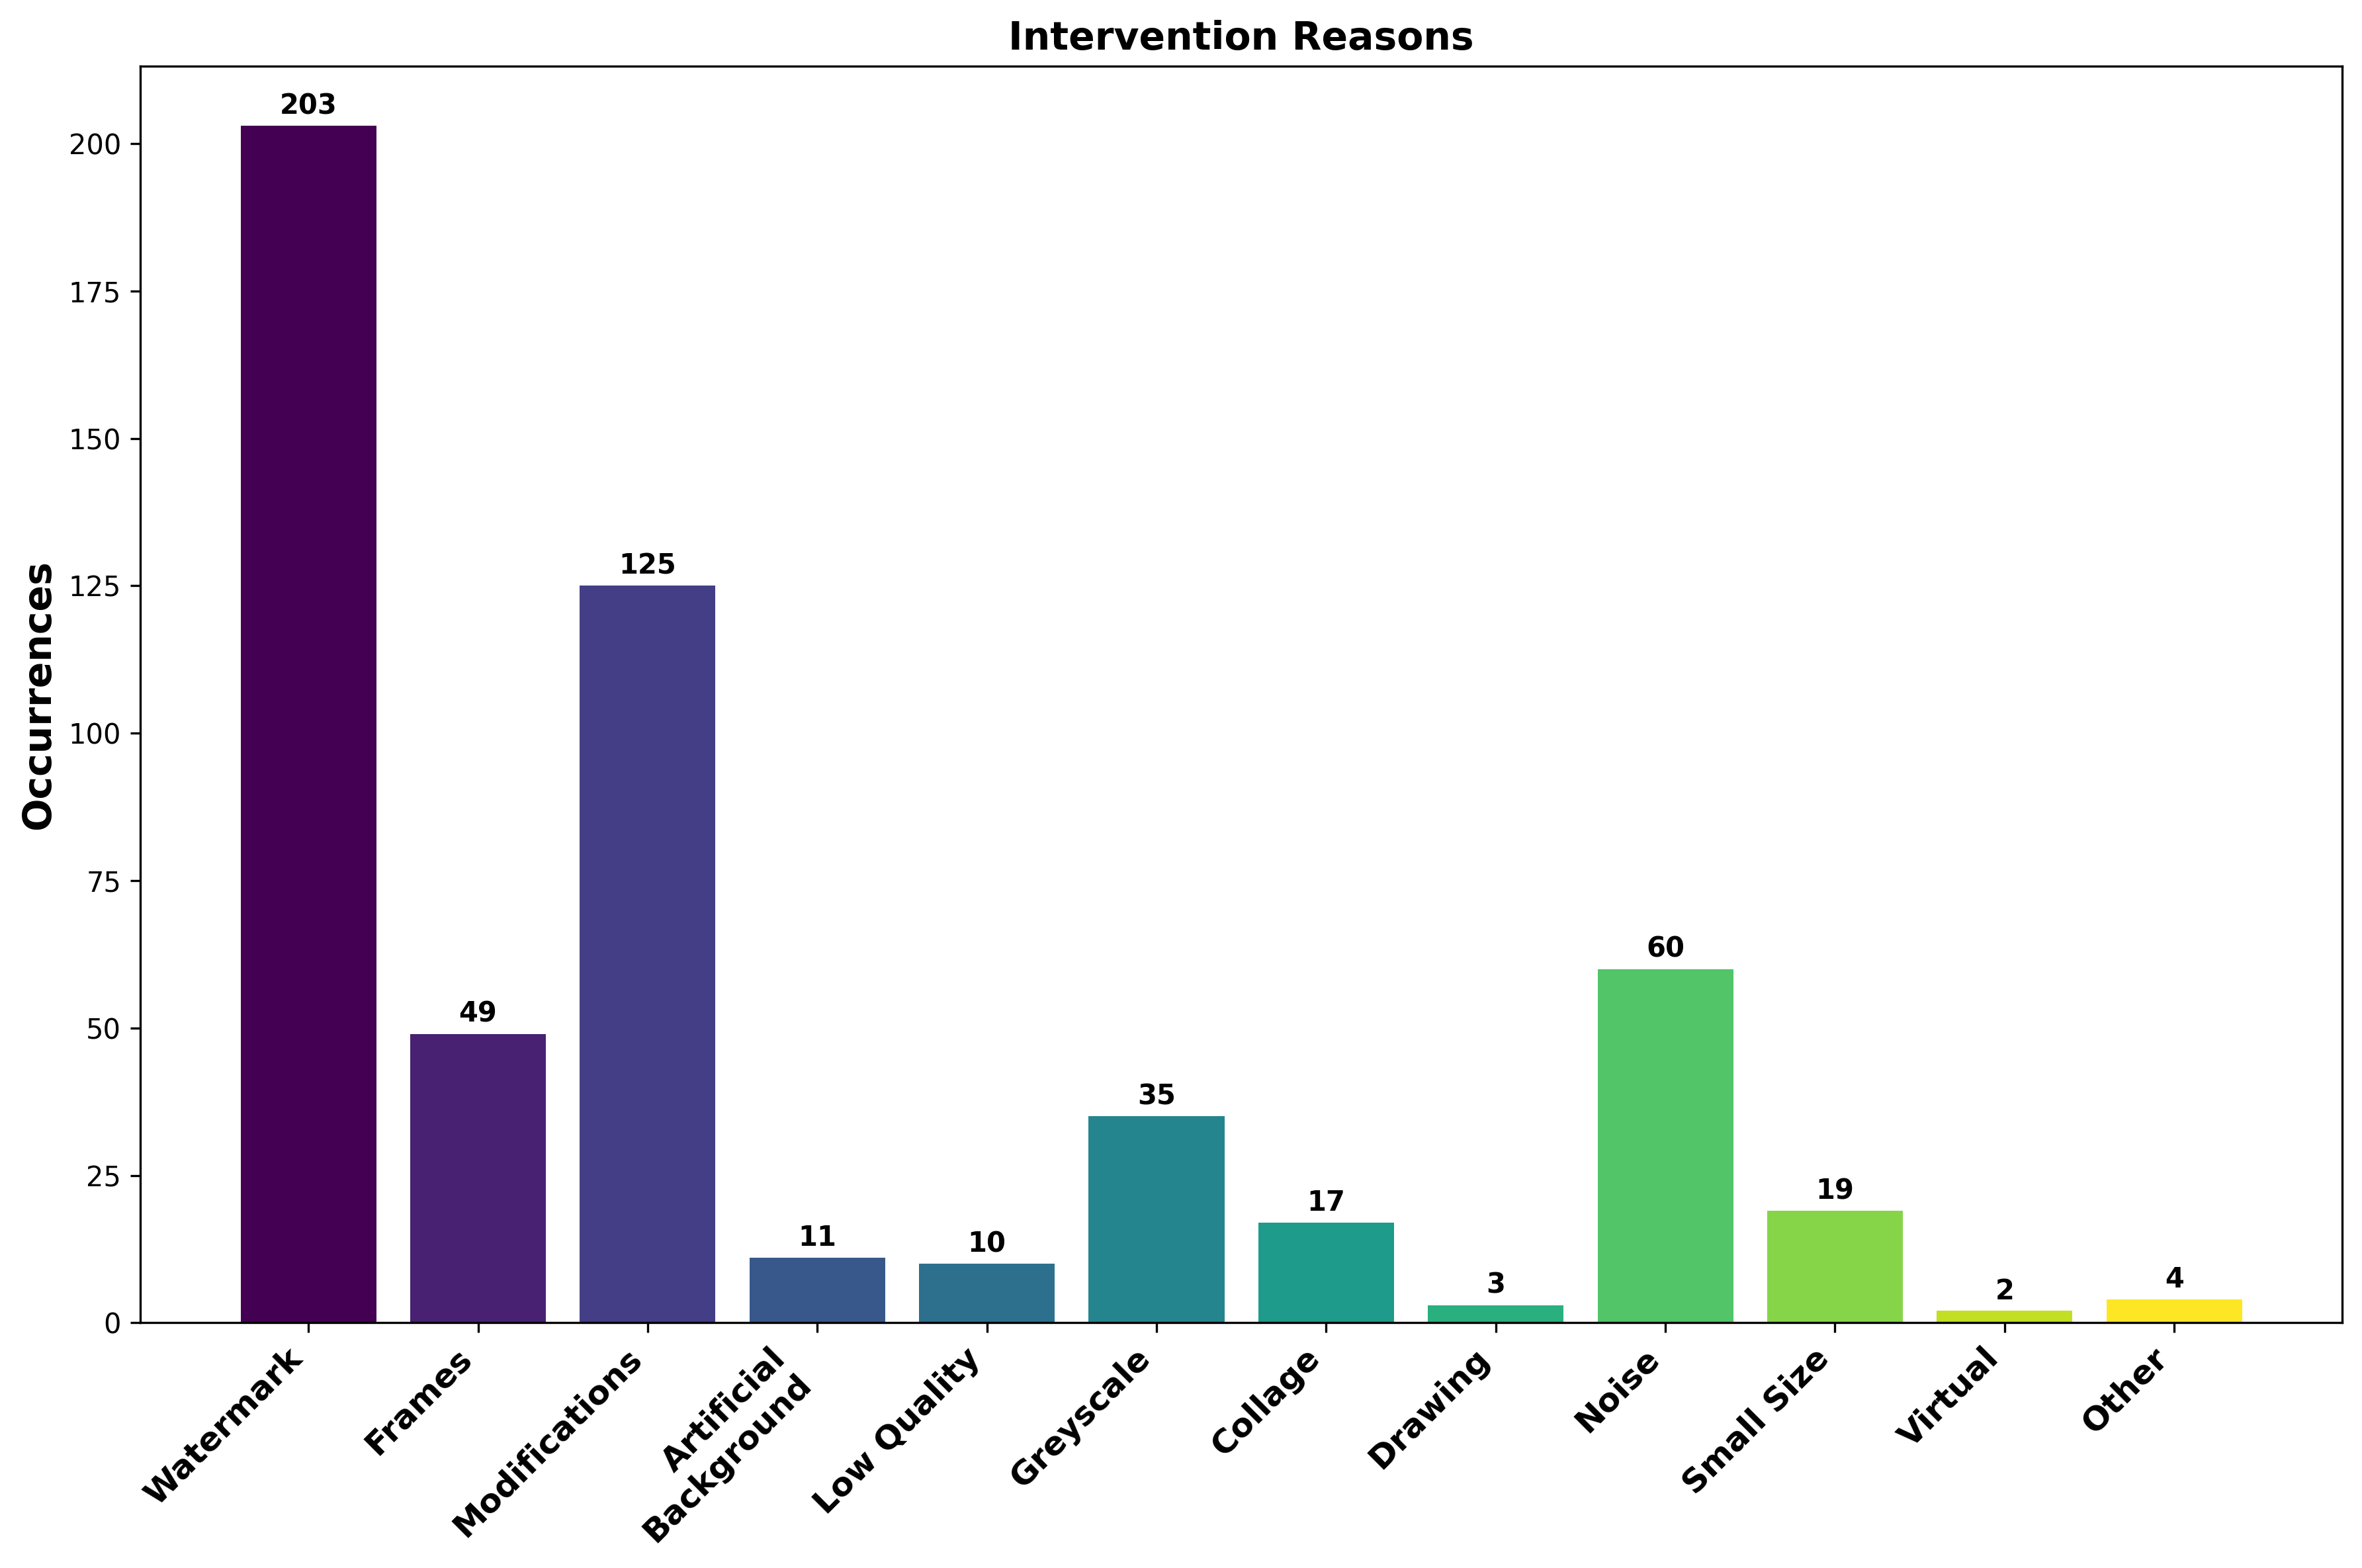

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Set the figure size and resolution
plt.figure(figsize=(12, 8), dpi=300)

# Create a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(keyword_dict)))

# Create the bar chart with the colormap
bars = plt.bar(keyword_dict.keys(), keyword_dict.values(), color=colors)

# Add the values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Set the title and labels with bold font
plt.title('Intervention Reasons', fontsize=14, fontweight='bold')
plt.ylabel('Occurrences', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability and set them to bold
plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()